In [1]:
import pandas as pd #for working with datasets
import numpy as np  #for working with numerical data
import seaborn as sns; sns.set() #for plotting nice graphic plots
import math
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#read raw csv data from file and consider the ts_start cloumn as a datetime column
#cdr_raw would be our dataset which is a Pandas object (dataframe)
cdr_raw = pd.read_csv('sample_cdr.csv', parse_dates=['ts_start'])
#The type of the object
print(type(cdr_raw))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#we represent some records from start of the file
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13


In [4]:
#we represent some records from end of the file
cdr_raw.tail()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start
374,99999999999,PI016U2,PI016U2,148,2012-11-09 13:46:49
375,99999999999,PI016G2,PI016G2,48,2012-11-09 14:39:04
376,99999999999,PI016U2,PI016U2,898,2012-11-09 14:43:26
377,99999999999,PI016U2,PI016U2,848,2012-11-09 14:58:48
378,99999999999,PI016U2,PI016U2,5,2012-11-09 22:58:26


In [5]:
def checkHour(h):
    if (0 <= h <= 6):
        return "t1" #Night
    elif (7 <= h <= 17):
        return "t2" #Working hours
    else:
        return "t3" #Evening

In [6]:
#to build our matrix we need to add two other columns to the data (weekday and hour in week), like the exam of VA.
#getting the weekday is easy, just check this for our cdr_raw:     cdr_raw["ts_start"].dt.weekday
#or this cdr_raw["ts_start"].dt.hour
cdr_raw['weekday'] = cdr_raw['ts_start'].apply(lambda x: x.weekday())
cdr_raw['hour'] = cdr_raw['ts_start'].apply(lambda x: x.hour)
cdr_raw['t'] = cdr_raw['ts_start'].apply(lambda x: checkHour(x.hour))  # adds t1, t2 or t3 to data
cdr_raw['weekno'] = cdr_raw['ts_start'].apply(lambda x: x.week)  # adds the week number in the year

In [7]:
#Again, we represent some records from start of the file. Now the two columns are added
cdr_raw.head()

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start,weekday,hour,t,weekno
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29,1,10,t2,41
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56,1,15,t2,41
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18,1,21,t3,41
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56,1,22,t3,41
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13,1,22,t3,41


In [8]:
#We can get a description of our data based on each column
cdr_raw.describe()

,id_chiamante,durata,weekday,hour,weekno
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000
mean,1.000000e+11,285.912929,2.271768,15.298153,42.875989
std,0.000000e+00,396.100356,1.589489,4.923572,1.239956
min,1.000000e+11,1.000000,0.000000,0.000000,41.000000
25%,1.000000e+11,31.000000,1.000000,10.000000,42.000000
50%,1.000000e+11,114.000000,2.000000,16.000000,43.000000
75%,1.000000e+11,364.000000,4.000000,20.000000,44.000000
max,1.000000e+11,1927.000000,6.000000,23.000000,45.000000


In [9]:
#How many unique users are there in our dataset?
len(cdr_raw.id_chiamante.unique())  #cdr_raw['id_chiamante']

1

In [10]:
#How many unique start cells are there in our dataset?
len(cdr_raw.id_cella_start.unique())

27

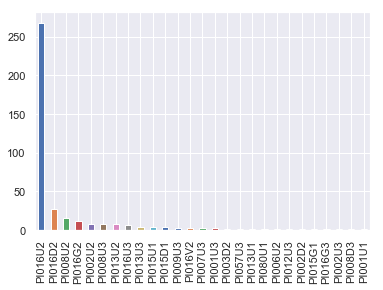

In [11]:
#Histogram of data for each start cell
cdr_raw['id_cella_start'].value_counts().plot(kind='bar')

In [12]:
#How many unique end cells are there in our dataset?
len(cdr_raw.id_cella_end.unique())

35

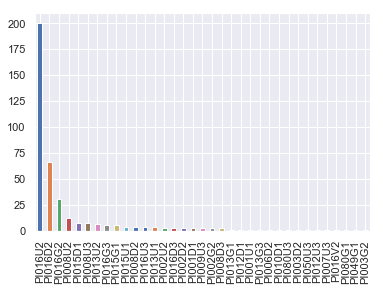

In [13]:
#Histogram of data for each end cell
cdr_raw['id_cella_end'].value_counts().plot(kind='bar')

In [14]:
#Now we want to build another data frame from our cdr_raw and call it cdr_matrix
#Using pivot_table
cdr_matrix = cdr_raw.pivot_table(index=cdr_raw["hour"],columns=cdr_raw["weekday"],aggfunc=len)

In [15]:
#The table is indexed based on "hour" and columned on weekdays (namely 0,1,2,3,4,5,6) and
#aggregated based on len, which means we get the length of each dimension. Actually, it means we get the count
#The aggregated data are for each of the columns of cdr_raw and are duplicate
cdr_matrix

durata                                   id_cella_end              \
weekday      0     1     2     3     4    5    6            0     1     2   
hour                                                                        
0          NaN   NaN   1.0   NaN   1.0  NaN  NaN          NaN   NaN   1.0   
1          NaN   NaN   1.0   NaN   NaN  NaN  NaN          NaN   NaN   1.0   
6          NaN   NaN   1.0   NaN   NaN  NaN  NaN          NaN   NaN   1.0   
7          NaN   NaN   4.0   1.0   1.0  NaN  NaN          NaN   NaN   4.0   
8          NaN   2.0   3.0   1.0   9.0  NaN  NaN          NaN   2.0   3.0   
9          9.0   4.0   7.0   5.0   8.0  2.0  2.0          9.0   4.0   7.0   
10         5.0   8.0  18.0   1.0   1.0  NaN  2.0          5.0   8.0  18.0   
11         1.0   NaN   3.0   1.0   1.0  1.0  1.0          1.0   NaN   3.0   
12         NaN   3.0   NaN   NaN   NaN  NaN  1.0          NaN   3.0   NaN   
13         7.0   8.0  10.0   1.0  13.0  1.0  1.0          7.0   8.0  10.0   
14         NaN   5.0   4.0   2.0  11.0  1.0  NaN          NaN   5.0   4.0   
15         2.0   2.0   4.0   6.0   2.0  NaN  NaN          2.0   2.0   4.0   
16         6.0   3.0   1.0   3.0   5.0  3.0  2.0          6.0   3.0   1.0   
17         4.0   1.0   4.0   2.0  12.0  NaN  NaN          4.0   1.0   4.0   
18         3.0   4.0   7.0   1.0   7.0  NaN  NaN          3.0   4.0   7.0   
19         NaN   NaN   2.0   4.0   3.0  NaN  NaN          NaN   NaN   2.0   
20         1.0  15.0   2.0   3.0   1.0  3.0  1.0          1.0  15.0   2.0   
21        12.0  13.0  10.0  11.0   2.0  NaN  1.0         12.0  13.0  10.0   
22         5.0  11.0   6.0   7.0   1.0  3.0  1.0          5.0  11.0   6.0   
23         1.0   1.0   2.0   NaN   NaN  NaN  NaN          1.0   1.0   2.0   

        ...  ts_start           weekno                                    
weekday ...         4    5    6      0     1     2     3     4    5    6  
hour    ...                                                               
0       ...       1.0  NaN  NaN    NaN   NaN   1.0   NaN   1.0  NaN  NaN  
1       ...       NaN  NaN  NaN    NaN   NaN   1.0   NaN   NaN  NaN  NaN  
6       ...       NaN  NaN  NaN    NaN   NaN   1.0   NaN   NaN  NaN  NaN  
7       ...       1.0  NaN  NaN    NaN   NaN   4.0   1.0   1.0  NaN  NaN  
8       ...       9.0  NaN  NaN    NaN   2.0   3.0   1.0   9.0  NaN  NaN  
9       ...       8.0  2.0  2.0    9.0   4.0   7.0   5.0   8.0  2.0  2.0  
10      ...       1.0  NaN  2.0    5.0   8.0  18.0   1.0   1.0  NaN  2.0  
11      ...       1.0  1.0  1.0    1.0   NaN   3.0   1.0   1.0  1.0  1.0  
12      ...       NaN  NaN  1.0    NaN   3.0   NaN   NaN   NaN  NaN  1.0  
13      ...      13.0  1.0  1.0    7.0   8.0  10.0   1.0  13.0  1.0  1.0  
14      ...      11.0  1.0  NaN    NaN   5.0   4.0   2.0  11.0  1.0  NaN  
15      ...       2.0  NaN  NaN    2.0   2.0   4.0   6.0   2.0  NaN  NaN  
16      ...       5.0  3.0  2.0    6.0   3.0   1.0   3.0   5.0  3.0  2.0  
17      ...      12.0  NaN  NaN    4.0   1.0   4.0   2.0  12.0  NaN  NaN  
18      ...       7.0  NaN  NaN    3.0   4.0   7.0   1.0   7.0  NaN  NaN  
19      ...       3.0  NaN  NaN    NaN   NaN   2.0   4.0   3.0  NaN  NaN  
20      ...       1.0  3.0  1.0    1.0  15.0   2.0   3.0   1.0  3.0  1.0  
21      ...       2.0  NaN  1.0   12.0  13.0  10.0  11.0   2.0  NaN  1.0  
22      ...       1.0  3.0  1.0    5.0  11.0   6.0   7.0   1.0  3.0  1.0  
23      ...       NaN  NaN  NaN    1.0   1.0   2.0   NaN   NaN  NaN  NaN  

[20 rows x 49 columns]

In [16]:
#To remove duplicates, we select just one column. We can choose any column
cdr_matrix = cdr_matrix["durata"]

In [78]:
cdr_matrix

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,4.0,1.0,1.0,0.0,0.0
8,0.0,2.0,3.0,1.0,9.0,0.0,0.0
9,9.0,4.0,7.0,5.0,8.0,2.0,2.0
10,5.0,8.0,18.0,1.0,1.0,0.0,2.0
11,1.0,0.0,3.0,1.0,1.0,1.0,1.0
12,0.0,3.0,0.0,0.0,0.0,0.0,1.0


In [76]:
#Now, this is the matrix and we want to draw heatmap for this.
#This matrix is the heatmap of all weeks, not week by week like the paper. Getting for every week is straightforward.
cdr_matrix = cdr_matrix.fillna(0)

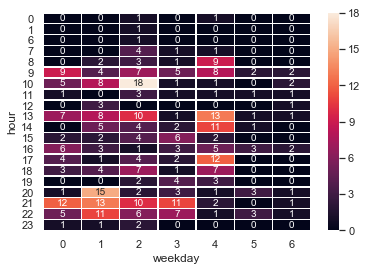

In [83]:
#Now, draw heatmap using sns
#more infor on : https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = sns.heatmap(cdr_matrix, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [19]:
#Grouping with weeks, so that we can have a feature (such as heatmap or OD graph) for each week

In [85]:
cdr_raw['weekno'].unique()

array([41, 42, 43, 44, 45])

In [86]:
grouped= cdr_raw.groupby('weekno')

In [95]:
grouped.groups.keys()

dict_keys([41, 42, 43, 44, 45])

In [94]:
grouped.get_group(41)

,id_chiamante,id_cella_start,id_cella_end,durata,ts_start,weekday,hour,t,weekno
0,99999999999,PI012U3,PI012U3,52,2012-10-09 10:06:29,1,10,t2,41
1,99999999999,PI016U2,PI016G3,602,2012-10-09 15:02:56,1,15,t2,41
2,99999999999,PI016U2,PI016U2,670,2012-10-09 21:55:18,1,21,t3,41
3,99999999999,PI016U2,PI016G2,509,2012-10-09 22:37:56,1,22,t3,41
4,99999999999,PI016D2,PI016D2,2,2012-10-09 22:49:13,1,22,t3,41
5,99999999999,PI016U2,PI016D2,1150,2012-10-10 00:27:56,2,0,t1,41
6,99999999999,PI016U2,PI016D2,359,2012-10-10 09:01:20,2,9,t2,41
7,99999999999,PI016D2,PI016D2,1,2012-10-10 09:36:04,2,9,t2,41
8,99999999999,PI016U2,PI016U2,82,2012-10-10 09:36:46,2,9,t2,41
9,99999999999,PI016U2,PI016U2,485,2012-10-10 09:38:49,2,9,t2,41


In [21]:
numberOfWeeks = len(grouped.groups.keys()) #5
NrCols = 3 # We want to have 3 graphs in each row.
NrRows = math.ceil(numberOfWeeks/NrCols)

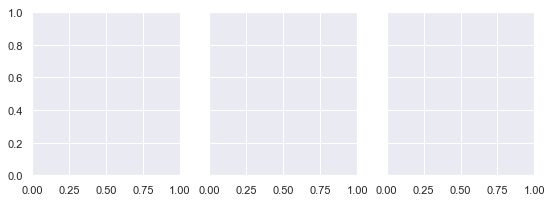

In [22]:
from matplotlib.figure import Figure
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

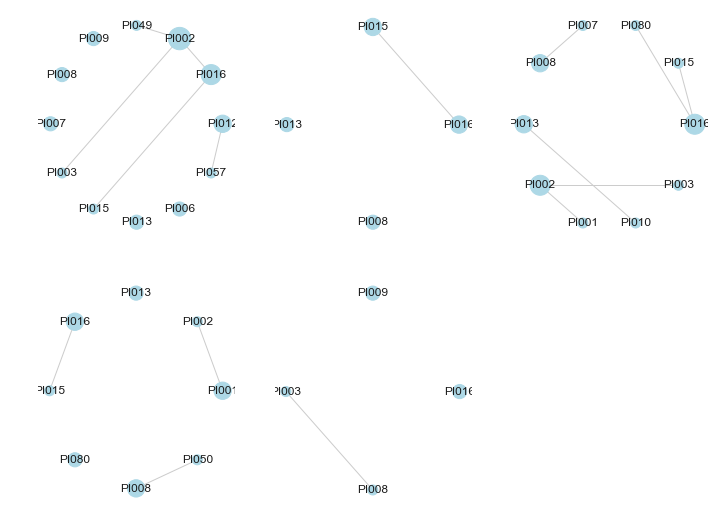

In [104]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    od_matrix = grouped.get_group(weekNumber)[['id_cella_start','id_cella_end']]
    od_matrix['id_cella_start'] = od_matrix['id_cella_start'].apply(lambda x: x[:-2])
    od_matrix['id_cella_end'] = od_matrix['id_cella_end'].apply(lambda x: x[:-2])
    g = nx.from_pandas_edgelist(od_matrix, source='id_cella_start', target='id_cella_end')
    cells = [cell for cell in g.nodes]
    degrees = [g.degree(cell) for cell in g.nodes]
    d = dict(zip(cells, degrees))
    plt.subplot(baseNumber + i)
    layout = nx.shell_layout(g)
    plt.axis('off')
    plt.box(on=True)
    nx.draw_networkx_nodes(g, 
                           layout, 
                           nodelist=d.keys(), 
                           node_size=[v * 100 for v in d.values()], # a LIST of sizes, based on g.degree
                           node_color='lightblue')

    nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

    nx.draw_networkx_labels(g, layout, labels=dict(zip(d.keys(), d.keys())))
    
    i += 1

fig.suptitle("Origin/Destination Matrix")

plt.show()

In [100]:
d

{'PI016': 2, 'PI009': 2, 'PI003': 1, 'PI008': 1}

In [24]:
# The next two cells are just for testing how to build matrix and heatmap

In [116]:
cdr_raw.groupby(['weekday','t']).count()['durata'].unstack().transpose()

weekday,0,1,2,3,4,5,6
t,,,,,,,
t1,NaN,NaN,3.0,NaN,1.0,NaN,NaN
t2,34.0,36.0,58.0,23.0,63.0,8.0,9.0
t3,22.0,44.0,29.0,26.0,14.0,6.0,3.0


In [25]:
cdr_matrixT = cdr_raw.groupby(['weekday', 't']).count()['durata'].unstack().transpose()

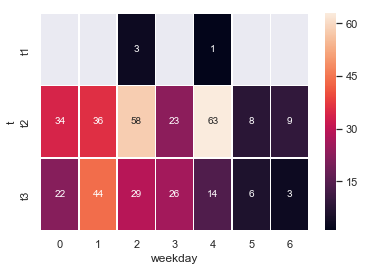

In [26]:
ax = sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1)

In [27]:
# Now we are going to build a heatmap for each week

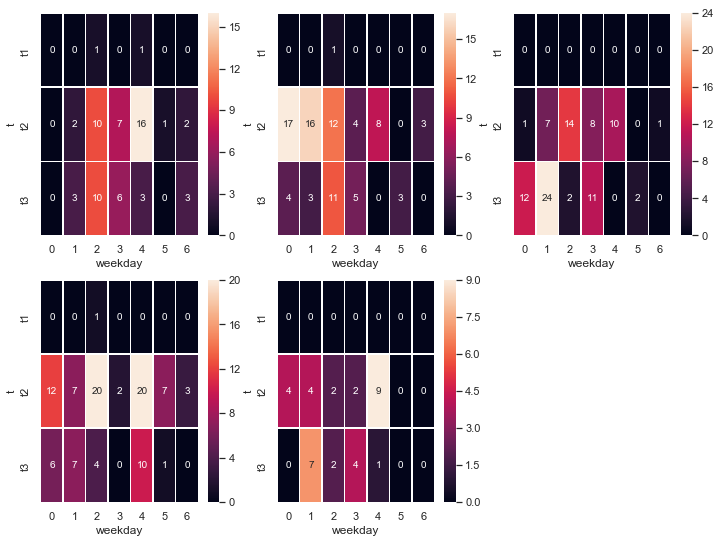

In [75]:
baseNumber = NrRows * 100 + NrCols * 10 + 1
plt.figure(figsize=(12,9))
i = 0
for weekNumber in grouped.groups.keys():
    #print (weekNumber)
    #print(grouped.groups[weekNumber])
    cdr_matrixT = grouped.get_group(weekNumber).groupby(['weekday', 't']).count()['durata'].unstack().transpose()
    cdr_matrixT = cdr_matrixT.fillna(0.0)
    #print(list(cdr_matrixT.columns))
    
    #checking for col differences
    col_diff = set(range(0,7)) - set(cdr_matrixT.columns) #contains the missing columns
    for col in col_diff:
        #print (col) #the missing column
        cdr_matrixT[col] = 0.0 #add the missing column with 0.0 for all rows
    # When we add the missing col, it is appended to the end, so we need to sort the names of the columns
    cdr_matrixT = cdr_matrixT[sorted(cdr_matrixT.columns)]
    
    #checking for row differences
    row_diff = {'t1', 't2', 't3'} - set(cdr_matrixT.index.values) #contains the missing rows
    for row in row_diff:
        #print (row) #the missing row
        cdr_matrixT.loc[row] = 0.0 #add the missing row with 0.0 for all columns
    # When we add the missing col, it is appended to the end, so we need to sort the names of the rows
    cdr_matrixT.sort_index(inplace=True)
    
    #print(cdr_matrixT.loc['t3'])

    sns.heatmap(cdr_matrixT, annot=True, linewidths=.5, xticklabels=1, yticklabels=1, ax=plt.subplot(baseNumber + i))
    i += 1

fig.suptitle("Origin/Destination Matrix")

plt.show()